In [108]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [109]:
zipcode = '97035'
filename = zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [110]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn
count,162,162,1.620000e+02,162.000000,162.000000,162.000000,162,162.000000,162,162,162,162,162,162
unique,162,162,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No
freq,1,1,NaN,NaN,NaN,NaN,90,NaN,104,92,160,106,123,157
mean,NaN,NaN,9.283610e+05,3.061728,2.391975,2115.493827,NaN,1980.222222,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.177257e+06,1.101616,0.988630,1321.639093,NaN,18.294689,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.325000e+05,2.000000,2.000000,1178.500000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.328445e+05,3.000000,2.500000,1742.500000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,9.497500e+05,4.000000,2.500000,2706.750000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df['log_price'] = np.log(df['price'])

In [112]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
has_hoa                0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
log_price              0
dtype: int64

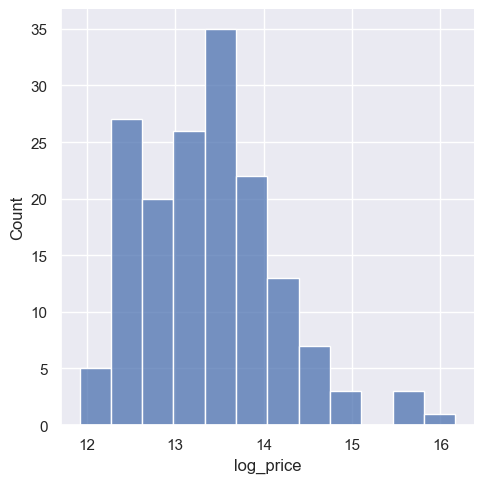

In [113]:
ax=sns.displot(df['log_price'])

In [114]:
q = df['log_price'].quantile(0.95)
df = df[df['log_price']<q]

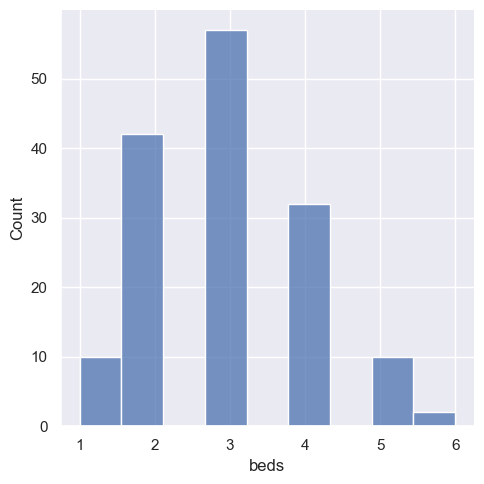

In [115]:
ax=sns.displot(df['beds'])

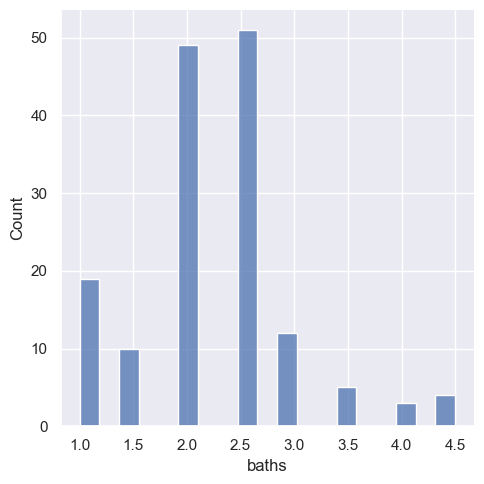

In [116]:
ax=sns.displot(df['baths'])

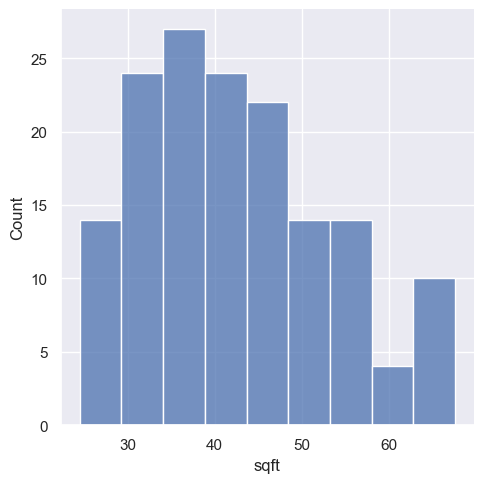

In [117]:
ax=sns.displot(np.sqrt(df['sqft']))

In [118]:
df['sqft'] = np.sqrt(df['sqft'])

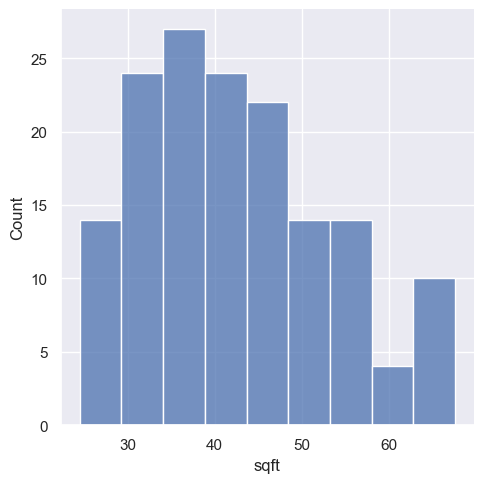

In [119]:
ax=sns.displot(df['sqft'])

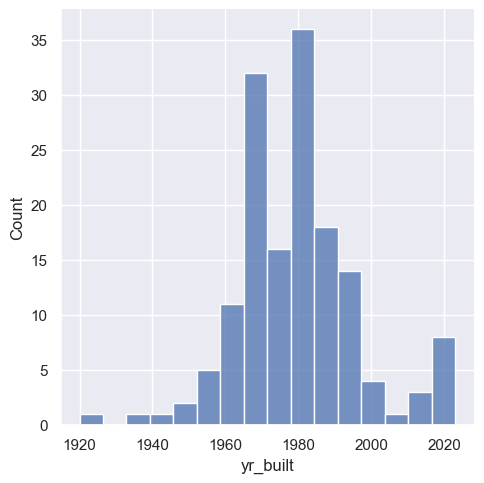

In [120]:
ax=sns.displot(df['yr_built'])

In [121]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [122]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn,log_price
count,151,151,1.510000e+02,151.000000,151.000000,151.000000,151,151.000000,151,151,151,151,151,151,151.000000
unique,151,151,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,83,NaN,94,89,149,95,112,149,NaN
mean,NaN,NaN,7.049048e+05,2.973510,2.238411,42.315296,NaN,1979.894040,NaN,NaN,NaN,NaN,NaN,NaN,13.274740
std,NaN,NaN,4.444198e+05,1.070495,0.754618,10.781706,NaN,15.440705,NaN,NaN,NaN,NaN,NaN,NaN,0.629456
min,NaN,NaN,1.500000e+05,1.000000,1.000000,24.494897,NaN,1941.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.918391
25%,NaN,NaN,3.240000e+05,2.000000,2.000000,33.984574,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.688456
50%,NaN,NaN,6.120940e+05,3.000000,2.000000,40.236799,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.324641
75%,NaN,NaN,8.925000e+05,4.000000,2.500000,49.295021,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.701746


## Checking OLS Assumptions

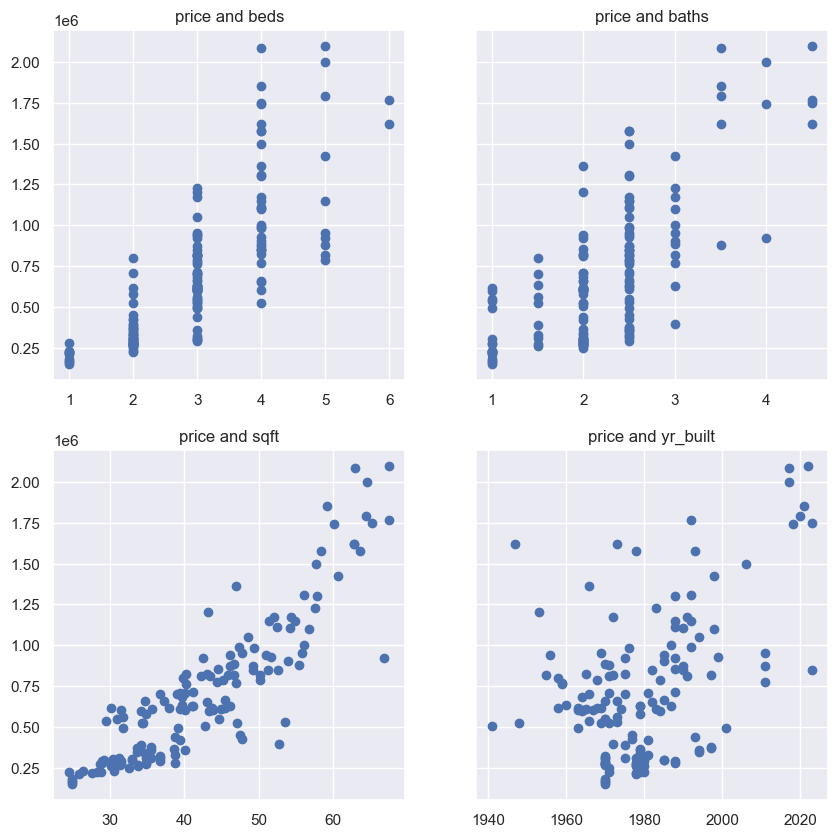

In [123]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['price'])
ax1.set_title('price and beds')
ax2.scatter(df['baths'], df['price'])
ax2.set_title('price and baths')
ax3.scatter(df['sqft'], df['price'])
ax3.set_title('price and sqft')
ax4.scatter(df['yr_built'], df['price'])
ax4.set_title('price and yr_built')

plt.show()

## Create Dummy variables

In [124]:
# Reorder columns
columns = ['Address', 'link', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]
cleaned_df = df[columns]

In [125]:
df = pd.get_dummies(df, columns=df.columns[8:], drop_first=True)

In [126]:
df.head()

,Address,link,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,14.556972,5,4.5,67.586981,2022,1,1,0,1,0,1,1
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,13.458836,3,1.5,36.742346,1966,0,0,0,1,0,0,0
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,13.592367,2,1.5,39.849718,1958,1,1,0,1,0,0,0
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,14.397726,5,3.5,64.505814,2020,0,1,0,1,0,0,1
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,14.299479,4,3.5,62.872888,1973,0,1,0,1,0,0,0


## Checking for multicollinearity

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['beds', 'baths', 'sqft', 'yr_built', 'view_yn_Yes', 'cooling_yn_Yes', 'senior_community_yn_Yes', 'style_Single Family Residential', 'county_Multnomah County', 'new_construction_yn_Yes', 'has_hoa_Yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [182]:
vif

,VIF,features
0,39.06,beds
1,45.96,baths
2,99.48,sqft
3,24.34,yr_built
4,2.58,view_yn_Yes
5,3.64,cooling_yn_Yes
6,1.13,senior_community_yn_Yes
7,8.40,style_Single Family Residential
8,1.75,county_Multnomah County
9,1.19,new_construction_yn_Yes


## Linear Regression Model

In [129]:
targets = df['log_price']
inputs = df.drop(['Address', 'link', 'baths', 'beds', 'price', 'log_price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [131]:
inputs_scaled = scaler.transform(inputs)

In [132]:
inputs_scaled

array([[ 2.3517414 ,  2.73602021,  0.77870596,  0.7677719 , -0.59009684,
         0.83464317],
       [-0.51860951, -0.90282642, -1.28418177,  0.7677719 , -0.59009684,
        -1.1981168 ],
       [-0.22944263, -1.42266166,  0.77870596,  0.7677719 , -0.59009684,
        -1.1981168 ],
       [ 2.06501305,  2.6060614 ,  0.77870596,  0.7677719 , -0.59009684,
         0.83464317],
       [ 1.91305564, -0.44797059,  0.77870596,  0.7677719 , -0.59009684,
        -1.1981168 ],
       [-1.09684351, -0.05809417, -1.28418177, -1.30247018,  1.69463709,
         0.83464317],
       [ 0.58775376,  0.91659689,  0.77870596,  0.7677719 , -0.59009684,
         0.83464317],
       [ 0.95197977,  0.52672047,  0.77870596,  0.7677719 , -0.59009684,
         0.83464317],
       [-1.1274911 ,  0.00688523, -1.28418177, -1.30247018,  1.69463709,
        -1.1981168 ],
       [-0.27408071,  0.07186464,  0.77870596, -1.30247018,  1.69463709,
         0.83464317],
       [ 0.19676482,  2.02124676,  0.77870596,  0.

### Train Test Split

In [133]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=47)

### Regression

In [134]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

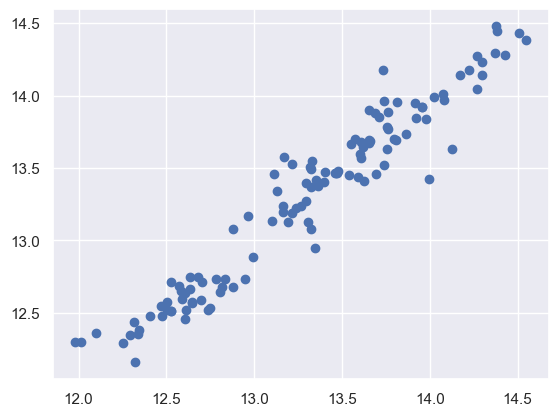

In [135]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)

Text(0.5, 1.0, 'Residuals PDF')

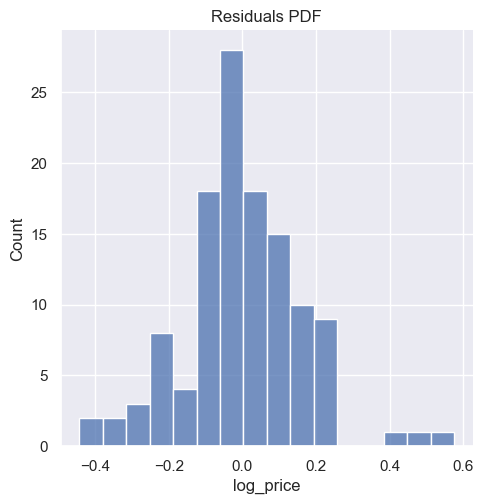

In [136]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [137]:
reg.score(x_train, y_train)

0.9361381695414163

In [138]:
reg.score(x_test, y_test)

0.8825574177364462

In [139]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [140]:
adj_r2(x_train, y_train)

0.9327472758887481

In [141]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = (np.exp(reg.coef_ / scaler.scale_) - 1) * 100

In [142]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [143]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,sqft,3.277455,422.535,0.0
1,yr_built,0.342234,15.658,0.0
2,cooling_yn_Yes,6.231194,22.850,0.0
3,style_Single Family Residential,69.249830,280.279,0.0
4,county_Multnomah County,-12.374009,23.019,0.0
5,has_hoa_Yes,-10.048363,15.274,0.0


In [144]:
y_hat_test = reg.predict(x_test)

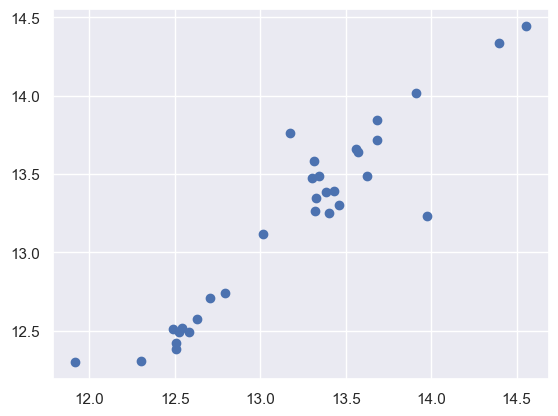

In [145]:
plt.scatter(y_test, y_hat_test)

In [146]:
df_pf = pd.DataFrame(y_hat_test, columns=['log_predictions'])
df_pf['predictions'] = np.exp(y_hat_test)

In [147]:
y_test = y_test.reset_index(drop=True)
df_pf['log_target'] = y_test
df_pf['target'] = np.exp(y_test)
df_pf

,log_predictions,predictions,log_target,target
0,13.659750,8.557642e+05,13.560618,775000.0
1,14.444128,1.875017e+06,14.556972,2099000.0
2,13.639108,8.382805e+05,13.573439,785000.0
3,12.383383,2.388003e+05,12.506177,270000.0
4,13.476895,7.127567e+05,13.304685,600000.0
5,12.710804,3.313082e+05,12.706848,330000.0
6,12.425366,2.490394e+05,12.506177,270000.0
7,13.584864,7.940198e+05,13.311329,604000.0
8,12.494141,2.667698e+05,12.581079,291000.0
9,12.574574,2.891134e+05,12.628067,305000.0


In [148]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = (df_pf['residual']/df_pf['target']*100).round(2)
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%
0,13.659750,8.557642e+05,13.560618,775000.0,-80764.177274,-10.42
1,14.444128,1.875017e+06,14.556972,2099000.0,223983.161642,10.67
2,13.639108,8.382805e+05,13.573439,785000.0,-53280.450640,-6.79
3,12.383383,2.388003e+05,12.506177,270000.0,31199.732383,11.56
4,13.476895,7.127567e+05,13.304685,600000.0,-112756.659158,-18.79
5,12.710804,3.313082e+05,12.706848,330000.0,-1308.212653,-0.40
6,12.425366,2.490394e+05,12.506177,270000.0,20960.617192,7.76
7,13.584864,7.940198e+05,13.311329,604000.0,-190019.787235,-31.46
8,12.494141,2.667698e+05,12.581079,291000.0,24230.192391,8.33
9,12.574574,2.891134e+05,12.628067,305000.0,15886.589420,5.21


In [149]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.8, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%,lower_bound,upper_bound
0,13.659750,8.557642e+05,13.560618,775000.0,-80764.177274,-10.42,7.062612e+05,1.005267e+06
1,14.444128,1.875017e+06,14.556972,2099000.0,223983.161642,10.67,1.725514e+06,2.024520e+06
2,13.639108,8.382805e+05,13.573439,785000.0,-53280.450640,-6.79,6.887775e+05,9.877834e+05
3,12.383383,2.388003e+05,12.506177,270000.0,31199.732383,11.56,8.929731e+04,3.883032e+05
4,13.476895,7.127567e+05,13.304685,600000.0,-112756.659158,-18.79,5.632537e+05,8.622596e+05
5,12.710804,3.313082e+05,12.706848,330000.0,-1308.212653,-0.40,1.818053e+05,4.808112e+05
6,12.425366,2.490394e+05,12.506177,270000.0,20960.617192,7.76,9.953643e+04,3.985423e+05
7,13.584864,7.940198e+05,13.311329,604000.0,-190019.787235,-31.46,6.445168e+05,9.435227e+05
8,12.494141,2.667698e+05,12.581079,291000.0,24230.192391,8.33,1.172669e+05,4.162728e+05
9,12.574574,2.891134e+05,12.628067,305000.0,15886.589420,5.21,1.396105e+05,4.386164e+05


# Writing predictions to csv

In [170]:
predicted_price = np.exp(reg.predict(inputs_scaled))
cleaned_df['predicted_price'] = predicted_price
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cleaned_df['difference'] = cleaned_df['predicted_price'] - cleaned_df['price']
cleaned_df['difference%'] = 100*cleaned_df['difference']/cleaned_df['price']
column_order = ['Address', 'link', 'price', 'predicted_price', 'difference', 'difference%', 'beds', 'baths', 'sqft',
       'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style',
       'county', 'new_construction_yn', 'has_hoa']
cleaned_df = cleaned_df[column_order]
cleaned_df

,Address,link,price,predicted_price,difference,difference%,beds,baths,sqft,yr_built,view_yn,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
0,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,2099000,1875016.84,-223983.16,-10.67,5,4.50,67.59,2022,Yes,Yes,No,Single Family Residential,Clackamas County,Yes,Yes
1,3569 Sunwood Ct,https://www.redfin.com/OR/Lake-Oswego/3569-Sun...,700000,599318.71,-100681.29,-14.38,3,1.50,36.74,1966,No,No,No,Single Family Residential,Clackamas County,No,No
2,6338 Washington Ct,https://www.redfin.com/OR/Lake-Oswego/6338-Was...,800000,684794.33,-115205.67,-14.40,2,1.50,39.85,1958,Yes,Yes,No,Single Family Residential,Clackamas County,No,No
3,4672 Winthrop Ct,https://www.redfin.com/OR/Lake-Oswego/4672-Win...,1790000,1686103.65,-103896.35,-5.80,5,3.50,64.51,2020,No,Yes,No,Single Family Residential,Clackamas County,No,Yes
4,16900 Gassner Ln,https://www.redfin.com/OR/Lake-Oswego/16900-Ga...,1622500,1514496.47,-108003.53,-6.66,4,3.50,62.87,1973,No,Yes,No,Single Family Residential,Clackamas County,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,5254 Westfield Ct,https://www.redfin.com/OR/Lake-Oswego/5254-Wes...,1300000,1219299.12,-80700.88,-6.21,4,2.50,57.84,1988,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
147,4638 Lower Dr,https://www.redfin.com/OR/Lake-Oswego/4638-Low...,307500,315532.08,8032.08,2.61,2,1.50,35.50,1975,No,No,No,Condo/Co-op,Clackamas County,No,Yes
148,4324 Woodside Cir,https://www.redfin.com/OR/Lake-Oswego/4324-Woo...,579000,562075.95,-16924.05,-2.92,2,2.00,34.79,1979,Yes,Yes,No,Single Family Residential,Clackamas County,No,Yes
149,110 Greenridge Ct,https://www.redfin.com/OR/Lake-Oswego/110-Gree...,527000,949522.58,422522.58,80.18,3,2.50,53.55,1973,No,No,No,Single Family Residential,Clackamas County,No,Yes


In [171]:
cleaned_df.to_csv('predictions.csv')

In [151]:
d = {'sqft': [1800], 'yr_built': [1999], 'cooling_yn_Yes': [1], 'style_Single Family Residential': [0], 'county_Multnomah County': [0], 'has_hoa_Yes': [1]}
ka_home = pd.DataFrame(data=d)
ka_home_scaled = scaler.transform(ka_home)
ka_hat = reg.predict(ka_home_scaled)

In [152]:
np.exp(ka_hat)

array([1.87805564e+30])

In [153]:
np.exp(ka_hat) - margin_error

array([1.87805564e+30])

In [154]:
np.exp(ka_hat) + margin_error

array([1.87805564e+30])